In [20]:
#Import

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import requests
import json
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline


In [51]:
sp_500_history = pd.read_json (r'../../data/rawdata/sp_500_history.json')
sp_500_history.head(3)

dateAdded       addedSecurity removedTicker  removedSecurity  \
0  March 22, 2021                               FLS        Flowserve   
1  March 22, 2021  NXP Semiconductors                                  
2  March 22, 2021                               SLG  SL Green Realty   

        date                         reason symbol  
0 2021-03-22  Market capitalization change.    FLS  
1 2021-03-22  Market capitalization change.   NXPI  
2 2021-03-22  Market capitalization change.    SLG

In [87]:
#Slicing Datafram with Added Symbols by year
sp_500_added = sp_500_history[['dateAdded','addedSecurity','symbol','reason']]
sp_500_added

dateAdded         addedSecurity symbol  \
0      March 22, 2021                          FLS   
1      March 22, 2021    NXP Semiconductors   NXPI   
2      March 22, 2021                          SLG   
3      March 22, 2021  Penn National Gaming   PENN   
4      March 22, 2021                          XRX   
..                ...                   ...    ...   
519  December 5, 2000       Ambac Financial    ABK   
520     July 27, 2000                          RAD   
521     July 27, 2000          JDS Uniphase   JDSU   
522  December 7, 1999                          LDW   
523  December 7, 1999                Yahoo!   YHOO   

                            reason  
0    Market capitalization change.  
1    Market capitalization change.  
2    Market capitalization change.  
3    Market capitalization change.  
4    Market capitalization change.  
..                             ...  
519            Market Cap changes.  
520             Market Cap change.  
521             Market Cap change.  
522             Market Cap change.  
523             Market Cap change.  

[524 rows x 4 columns]

In [111]:
#Slicing Datafram with Removed Symbols by year
sp_500_removed = sp_500_history[['date','removedTicker','symbol','reason']]
sp_500_removed

date removedTicker symbol                         reason
0   2021-03-22           FLS    FLS  Market capitalization change.
1   2021-03-22                 NXPI  Market capitalization change.
2   2021-03-22           SLG    SLG  Market capitalization change.
3   2021-03-22                 PENN  Market capitalization change.
4   2021-03-22           XRX    XRX  Market capitalization change.
..         ...           ...    ...                            ...
519 2000-12-05                  ABK            Market Cap changes.
520 2000-07-27           RAD    RAD             Market Cap change.
521 2000-07-27                 JDSU             Market Cap change.
522 1999-12-07           LDW    LDW             Market Cap change.
523 1999-12-07                 YHOO             Market Cap change.

[524 rows x 4 columns]

In [112]:
#Remove the empty Removed Ticker

nan_value_1 = float("NaN")
sp_500_removed.replace("", nan_value_1, inplace=True)
sp_500_removed.dropna(subset = ["removedTicker"], inplace=True)
type(sp_500_removed)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-d212e39ffb33>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

In [94]:
#Remove the empty Added Security

nan_value = float("NaN")
sp_500_added.replace("", nan_value, inplace=True)
sp_500_added.dropna(subset = ["addedSecurity"], inplace=True)
type(sp_500_added)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-94-64e30514256d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

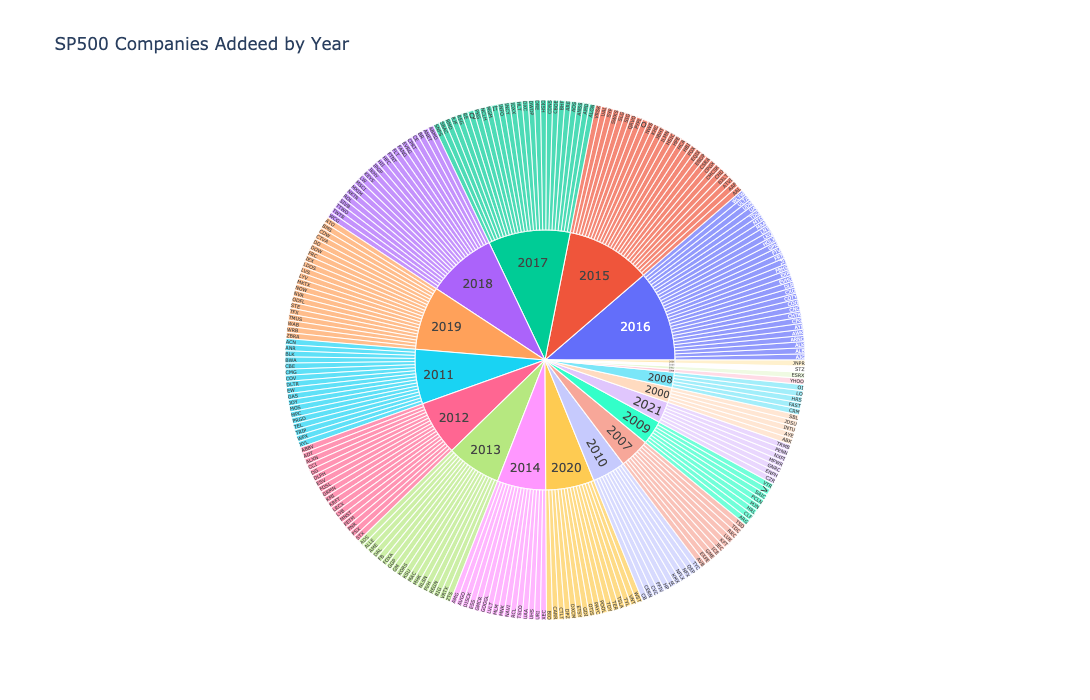

In [110]:
# Sunburst Plot SP 500 Added companies by Year

sp500_add_plot = px.sunburst(
     sp_500_added,
     path=[pd.DatetimeIndex(sp_500_added['dateAdded']).year, "symbol"],
     width=700,height=700,
    title='SP500 Companies Addeed by Year',
)
sp500_add_plot.show()

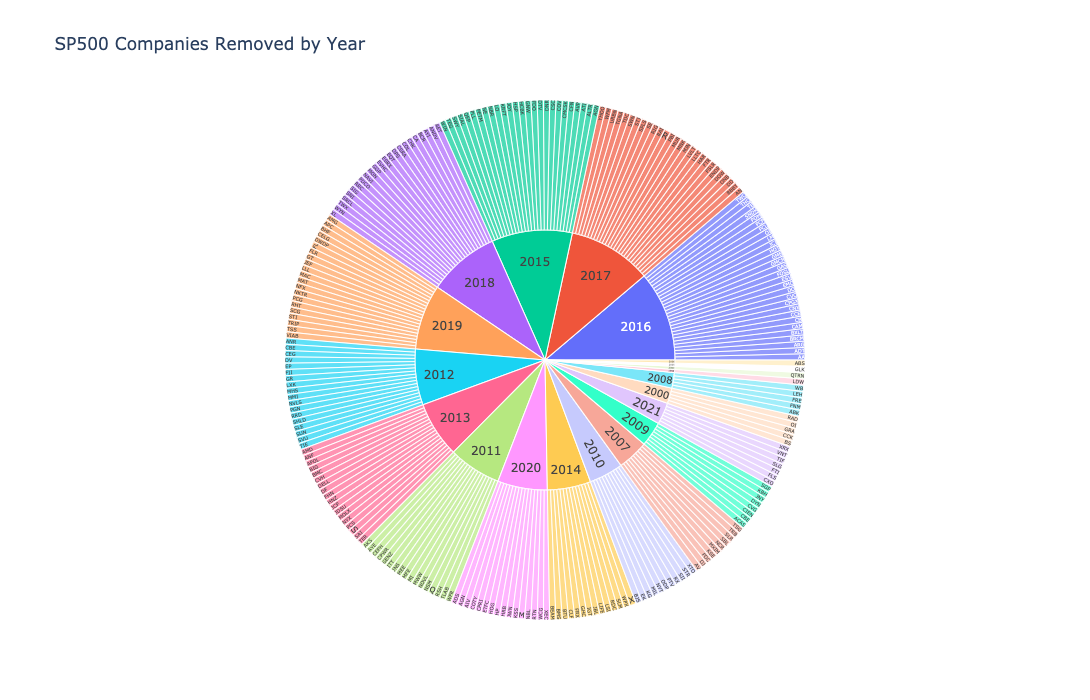

In [114]:
# Sunburst Plot SP 500 Added companies by Year

sp500_removed_plot = px.sunburst(
     sp_500_removed,
     path=[pd.DatetimeIndex(sp_500_removed['date']).year, "symbol"],
     width=700,height=700,
    title='SP500 Companies Removed by Year',
)
sp500_removed_plot.show()

In [115]:
nasdad_100_history = pd.read_json(r'../../data/rawdata/nasdaq_100_history.json')
nasdad_100_history

dateAdded addedSecurity removedTicker  \
0    December 21, 2020      Okta Inc          None   
1    December 21, 2020          None         LBTYA   
2    December 21, 2020          None         LBTYK   
3    December 21, 2020          None          TTWO   
4    December 21, 2020          None          ULTA   
..                 ...           ...           ...   
753   December 2, 1997          GENZ                 
754   December 2, 1997          GNCI                 
755   December 2, 1997   Gartner Inc                 
756   December 2, 1997          FORE                 
757   December 2, 1997    Fiserv Inc                 

                        removedSecurity       date  \
0                                  None 2020-12-21   
1                    Liberty Global plc 2020-12-21   
2                    Liberty Global plc 2020-12-21   
3    Take-Two Interactive Software, Inc 2020-12-21   
4                      Ulta Beauty, Inc 2020-12-21   
..                                  ...        ...   
753                                     1997-12-02   
754                                     1997-12-02   
755                                     1997-12-02   
756                                     1997-12-02   
757                                     1997-12-02   

                            reason symbol  
0     Market capitalization change   OKTA  
1     Market capitalization change  LBTYA  
2     Market capitalization change  LBTYK  
3     Market capitalization change   TTWO  
4     Market capitalization change   ULTA  
..                             ...    ...  
753  Market capitalization change.   GENZ  
754  Market capitalization change.   GNCI  
755  Market capitalization change.     IT  
756  Market capitalization change.   FORE  
757  Market capitalization change.   FISV  

[758 rows x 7 columns]

In [117]:
#Slicing Datafram with Added Symbols by year
nasdaq_100_added = nasdad_100_history[['dateAdded','addedSecurity','symbol','reason']]
nasdaq_100_added

dateAdded addedSecurity symbol                         reason
0    December 21, 2020      Okta Inc   OKTA   Market capitalization change
1    December 21, 2020          None  LBTYA   Market capitalization change
2    December 21, 2020          None  LBTYK   Market capitalization change
3    December 21, 2020          None   TTWO   Market capitalization change
4    December 21, 2020          None   ULTA   Market capitalization change
..                 ...           ...    ...                            ...
753   December 2, 1997          GENZ   GENZ  Market capitalization change.
754   December 2, 1997          GNCI   GNCI  Market capitalization change.
755   December 2, 1997   Gartner Inc     IT  Market capitalization change.
756   December 2, 1997          FORE   FORE  Market capitalization change.
757   December 2, 1997    Fiserv Inc   FISV  Market capitalization change.

[758 rows x 4 columns]

In [125]:
#Slicing Datafram with Removed Symbols by year

nasdaq_100_removed = nasdad_100_history[['date','removedTicker','symbol','reason']]
nasdaq_100_removed

date removedTicker symbol                         reason
0   2020-12-21          None   OKTA   Market capitalization change
1   2020-12-21         LBTYA  LBTYA   Market capitalization change
2   2020-12-21         LBTYK  LBTYK   Market capitalization change
3   2020-12-21          TTWO   TTWO   Market capitalization change
4   2020-12-21          ULTA   ULTA   Market capitalization change
..         ...           ...    ...                            ...
753 1997-12-02                 GENZ  Market capitalization change.
754 1997-12-02                 GNCI  Market capitalization change.
755 1997-12-02                   IT  Market capitalization change.
756 1997-12-02                 FORE  Market capitalization change.
757 1997-12-02                 FISV  Market capitalization change.

[758 rows x 4 columns]

In [122]:
#Remove the empty Added Ticker

nan_value_1 = float("NaN")
nasdaq_100_added.replace("None", nan_value_1, inplace=True)
nasdaq_100_added.dropna(subset = ["addedSecurity"], inplace=True)
type(nasdaq_100_added)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-70afd3af7e69>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

In [126]:
#Remove the empty Removed Ticker

nan_value_1 = float("NaN")
nasdaq_100_removed.replace("None", nan_value_1, inplace=True)
nasdaq_100_removed.dropna(subset = ["removedTicker"], inplace=True)
type(nasdaq_100_removed)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-76c8ad3c49b2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

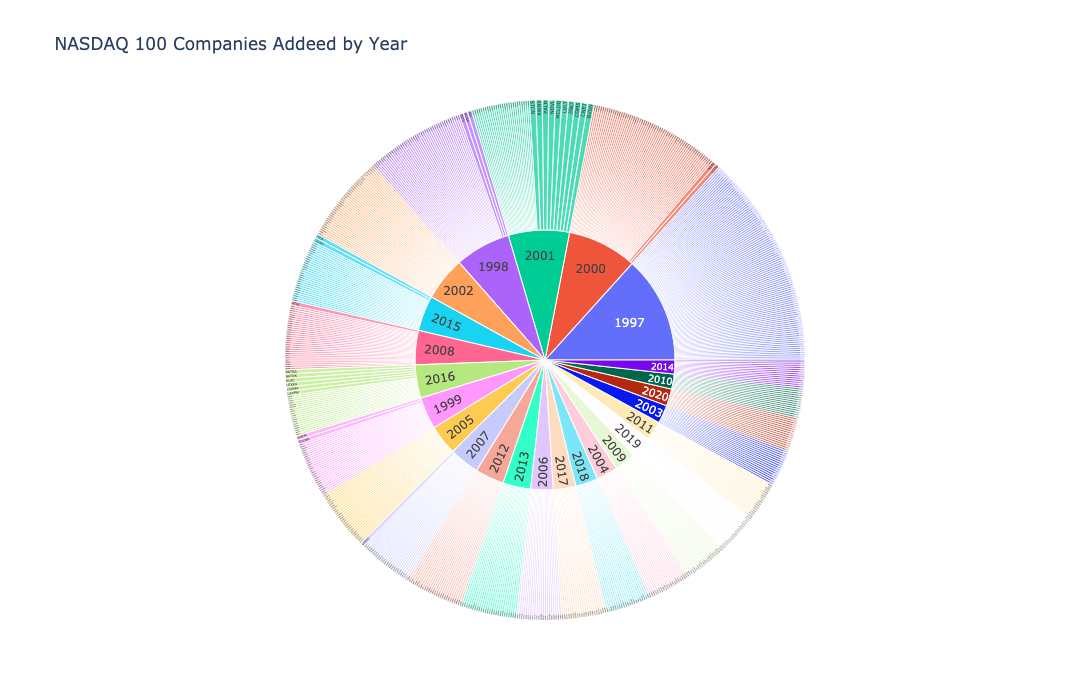

In [130]:
# Sunburst Plot NASDAQ 100 Added companies by Year

NASDAQ_100_add_plot = px.sunburst(
     nasdaq_100_added,
     path=[pd.DatetimeIndex(nasdaq_100_added['dateAdded']).year, "symbol"],
     width=700,height=700,
    title='NASDAQ 100 Companies Addeed by Year',
)
NASDAQ_100_add_plot.show()

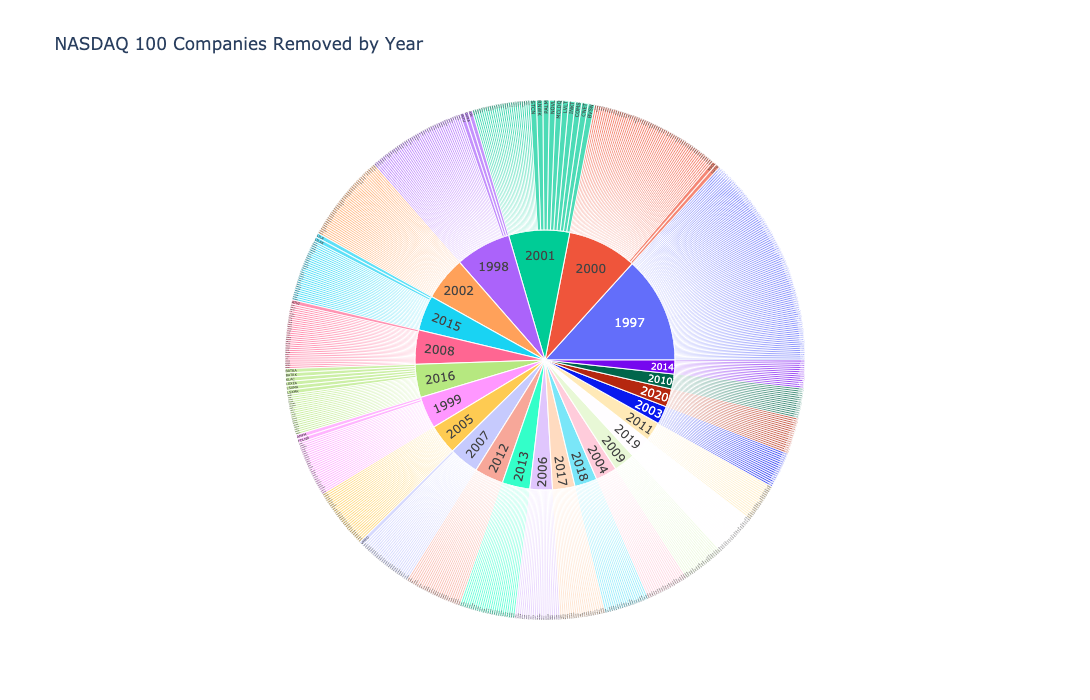

In [133]:
# Sunburst Plot NASDAQ 100 Removed companies by Year

NASDAQ_100_removed_plot = px.sunburst(
     nasdaq_100_removed,
     path=[pd.DatetimeIndex(nasdaq_100_removed['date']).year, "symbol"],
     width=700,height=700,
    title='NASDAQ 100 Companies Removed by Year',
)
NASDAQ_100_removed_plot.show()

In [120]:
dow_jones_history = pd.read_json(r'../../data/rawdata/dow_jones_history.json')
dow_jones_history

dateAdded                addedSecurity removedTicker  \
0   August 31, 2020           Salesforce.Com Inc                 
1   August 31, 2020                                        RTX   
2   August 31, 2020                                        PFE   
3   August 31, 2020  Honeywell International Inc                 
4   August 31, 2020                                        XOM   
..              ...                          ...           ...   
79  January 1, 1994                        BHMSQ                 
80  January 1, 1994                     AT&T Inc                 
81  January 1, 1994          American Express Co                 
82  January 1, 1994             Altria Group Inc                 
83  January 1, 1994                        3M Co                 

               removedSecurity       date                         reason  \
0                              2020-08-31  Market capitalization change.   
1   Raytheon Technologies Corp 2020-08-31   Market capitalization change   
2                   Pfizer Inc 2020-08-31   Market capitalization change   
3                              2020-08-31  Market capitalization change.   
4             Exxon Mobil Corp 2020-08-31   Market capitalization change   
..                         ...        ...                            ...   
79                             1994-01-01  Market capitalization change.   
80                             1994-01-01  Market capitalization change.   
81                             1994-01-01  Market capitalization change.   
82                             1994-01-01  Market capitalization change.   
83                             1994-01-01  Market capitalization change.   

   symbol  
0     CRM  
1     RTX  
2     PFE  
3     HON  
4     XOM  
..    ...  
79  BHMSQ  
80      T  
81    AXP  
82     MO  
83    MMM  

[84 rows x 7 columns]

In [121]:
#Slicing Datafram with Added Symbols by year
dow_jones_added = dow_jones_history[['dateAdded','addedSecurity','symbol','reason']]
dow_jones_added

dateAdded                addedSecurity symbol  \
0   August 31, 2020           Salesforce.Com Inc    CRM   
1   August 31, 2020                                 RTX   
2   August 31, 2020                                 PFE   
3   August 31, 2020  Honeywell International Inc    HON   
4   August 31, 2020                                 XOM   
..              ...                          ...    ...   
79  January 1, 1994                        BHMSQ  BHMSQ   
80  January 1, 1994                     AT&T Inc      T   
81  January 1, 1994          American Express Co    AXP   
82  January 1, 1994             Altria Group Inc     MO   
83  January 1, 1994                        3M Co    MMM   

                           reason  
0   Market capitalization change.  
1    Market capitalization change  
2    Market capitalization change  
3   Market capitalization change.  
4    Market capitalization change  
..                            ...  
79  Market capitalization change.  
80  Market capitalization change.  
81  Market capitalization change.  
82  Market capitalization change.  
83  Market capitalization change.  

[84 rows x 4 columns]

In [127]:
#Slicing Datafram with Removed Symbols by year

dow_jones_removed = dow_jones_history[['date','removedTicker','symbol','reason']]
dow_jones_removed

date removedTicker symbol                         reason
0  2020-08-31                  CRM  Market capitalization change.
1  2020-08-31           RTX    RTX   Market capitalization change
2  2020-08-31           PFE    PFE   Market capitalization change
3  2020-08-31                  HON  Market capitalization change.
4  2020-08-31           XOM    XOM   Market capitalization change
..        ...           ...    ...                            ...
79 1994-01-01                BHMSQ  Market capitalization change.
80 1994-01-01                    T  Market capitalization change.
81 1994-01-01                  AXP  Market capitalization change.
82 1994-01-01                   MO  Market capitalization change.
83 1994-01-01                  MMM  Market capitalization change.

[84 rows x 4 columns]

In [123]:
#Remove the empty addedSecurity Ticker

nan_value_1 = float("NaN")
dow_jones_added.replace("", nan_value_1, inplace=True)
dow_jones_added.dropna(subset = ["addedSecurity"], inplace=True)
type(dow_jones_added)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-b5c317ece63a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

In [128]:
#Remove the empty Removed Ticker

nan_value_1 = float("NaN")
dow_jones_removed.replace("", nan_value_1, inplace=True)
dow_jones_removed.dropna(subset = ["removedTicker"], inplace=True)
type(dow_jones_removed)

/Users/jc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-95a8c8eb98e0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pandas.core.frame.DataFrame

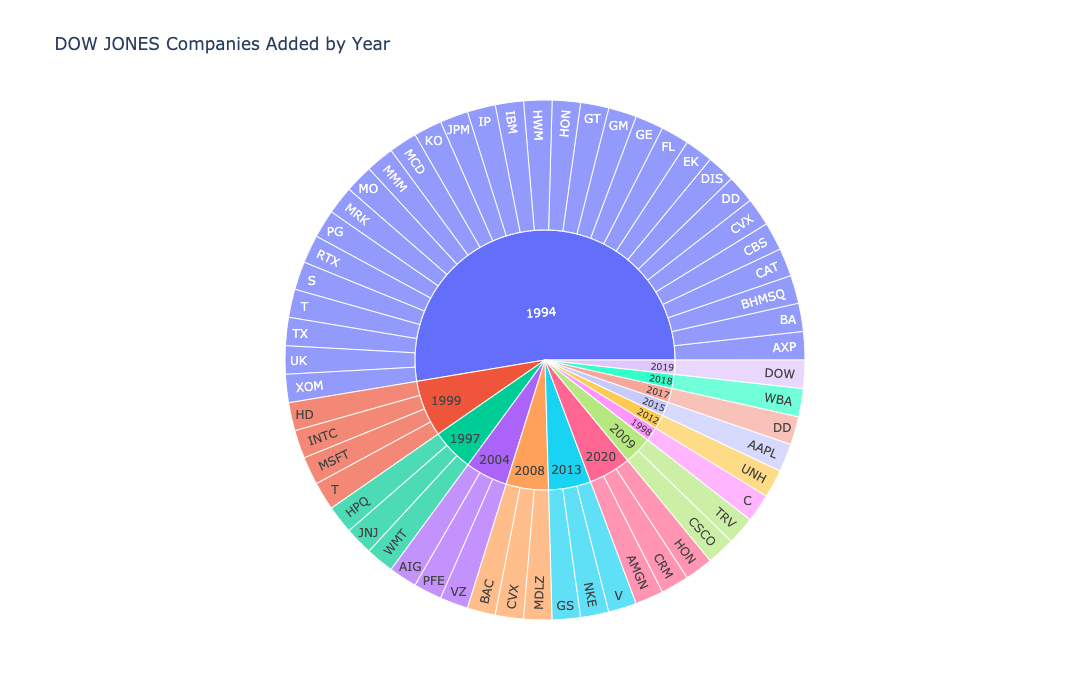

In [132]:
# Sunburst Plot DOW JONES Added companies by Year

dow_jones_add_plot = px.sunburst(
     dow_jones_added,
     path=[pd.DatetimeIndex(dow_jones_added['dateAdded']).year, "symbol"],
     width=700,height=700,
    title='DOW JONES Companies Added by Year',
)
dow_jones_add_plot.show()

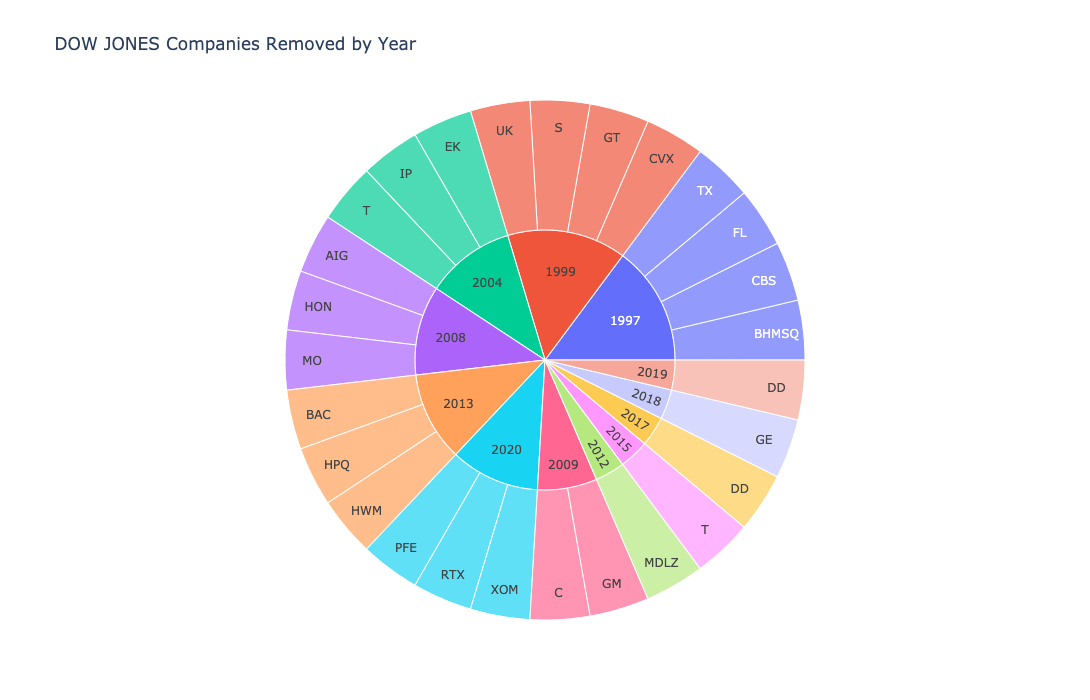

In [134]:
# Sunburst Plot DOW JONES Removed companies by Year

dow_jones_removed_plot = px.sunburst(
     dow_jones_removed,
     path=[pd.DatetimeIndex(dow_jones_removed['date']).year, "symbol"],
     width=700,height=700,
    title='DOW JONES Companies Removed by Year',
)
dow_jones_removed_plot.show()